In [10]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

original = {
    "0":[],
    "10":[],
    "20":[],
    "30":[],
    "40":["car"],
    "50":["car"],
    "60":["car"],
    "70":["car"],
    "80":["car"],
    "90":["car"],
    "100":["car"],
    "110":["car"],
    "120":["car"],
    "130":["car"],
    "140":["car"],
    "150":["car","person"],
    "160":["car"],
    "170":["car"],
    "180":["car"],
    "190":["car"]
}

bits = ["1", "2", "4", "6", "8", "12", "16", "24", "32"]
layers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"]
layerResults = {
    
}

for frame in original:
    layerResults[frame] = {}
    for layer in layers:
        layerResults[frame][layer] = {}
        for bit in bits:
            if len(original[frame]) == 0:
                layerResults[frame][layer][bit] = "TN"
            else:
                layerResults[frame][layer][bit] = "FN"
#print layerResults
print layerResults["0"]["14"]

{'24': 'TN', '12': 'TN', '16': 'TN', '32': 'TN', '1': 'TN', '2': 'TN', '4': 'TN', '6': 'TN', '8': 'TN'}


In [11]:




with open('/home/philipp/usb/projects/yolo_part2/res.csv', 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=';')
        for row in spamreader:
            frame = row[0].split('_')[3].split("/")[0]
            layer = row[0].split('_')[4]
            bit = row[0].split('/')[9].split("_")[0]
            detectedClass = row[1].split(":")[0].strip()
            detectedClass_p = row[1].split(":")[1]
            frameResults = original[frame];
            if detectedClass in frameResults:
                #print "TP: " + detectedClass
                if layerResults[frame][layer][bit] != "FP":
                    layerResults[frame][layer][bit] = "TP"
            else:
                #print "FP: '" + detectedClass + "' " + str(frameResults)
                layerResults[frame][layer][bit] = "FP"
            #print row

print layerResults["0"]["14"]

{'24': 'TN', '12': 'TN', '16': 'TN', '32': 'TN', '1': 'TN', '2': 'FP', '4': 'TN', '6': 'TN', '8': 'TN'}


In [54]:
bitResults={}
# TN, TP, FN, FP
for bit in bits:
    bitResults[int(bit)] = [0,0,0,0]

for frame in layerResults:
    for layer in layerResults[frame]:
        for bit in layerResults[frame][layer]:
            result = layerResults[frame][layer][bit]
            #print result
            if result == "TN":
                     bitResults[int(bit)][0] += 1
            if result == "TP":
                     bitResults[int(bit)][1] += 1
            if result == "FN":
                     bitResults[int(bit)][2] += 1
            if result == "FP":
                     bitResults[int(bit)][3] +=1

table = pd.DataFrame(bitResults)
sortedT = table.transpose()
print sortedT
import StringIO
s = StringIO.StringIO()
sortedT.to_csv(s)
print s.getvalue()


     0    1    2   3
1   52    0  208  40
2   51   65  158  26
4   57  198   23  22
6   59  235    5   1
8   60  240    0   0
12  60  240    0   0
16  60  240    0   0
24  60  240    0   0
32  60  240    0   0
,0,1,2,3
1,52,0,208,40
2,51,65,158,26
4,57,198,23,22
6,59,235,5,1
8,60,240,0,0
12,60,240,0,0
16,60,240,0,0
24,60,240,0,0
32,60,240,0,0



In [57]:
LayerBitResults={}
# TN, TP, FN, FP
for layer in layers:
    LayerBitResults[layer] = {}
    for bit in bits:
        LayerBitResults[layer][bit] = [0,0,0,0]

for frame in layerResults:
    for layer in layerResults[frame]:
        for bit in layerResults[frame][layer]:
            result = layerResults[frame][layer][bit]
            #print result
            if result == "TN":
                     LayerBitResults[layer][bit][0] += 1
            if result == "TP":
                     LayerBitResults[layer][bit][1] += 1
            if result == "FN":
                     LayerBitResults[layer][bit][2] += 1
            if result == "FP":
                     LayerBitResults[layer][bit][3] +=1

                    


,1,12,16,2,24,32,4,6,8
0,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 15, 1, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 14, 2, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
1,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[2, 9, 7, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 2, 1]","[4, 15, 1, 0]","[4, 16, 0, 0]"
10,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 3, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
11,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 2, 14, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
12,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 7, 8, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
13,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 11, 5, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]"
14,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]",

,1,12,16,2,24,32,4,6,8
0,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 15, 1, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 14, 2, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
1,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[2, 9, 7, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 2, 1]","[4, 15, 1, 0]","[4, 16, 0, 0]"
10,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 3, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
11,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 2, 14, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
12,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 7, 8, 2]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
13,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 1, 15, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 11, 5, 0]","[4, 15, 1, 0]","[4, 16, 0, 0]"
14,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]","[1, 4, 0, 15]","[3, 16, 0, 1]","[4, 16, 0, 0]"
2,"[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]","[3, 11, 5, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 14, 1, 1]","[4, 16, 0, 0]","[4, 16, 0, 0]"
3,"[0, 0, 0, 20]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 3, 13, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]"
4,"[4, 0, 16, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 3, 13, 0]","[4, 16, 0, 0]","[4, 16, 0, 0]","[4, 13, 2, 1]","[4, 15, 1, 0]","[4, 16, 0, 0]"


In [14]:
def accuracy(a): 
    acc = (a[1]+a[0])/(a[0]+a[1]+a[2]+a[3]*1.0)
    return acc

bitResults_acc = [(int(k), accuracy(v)) for k, v in bitResults.items()]

print bitResults_acc


[(24, 1.0), (12, 1.0), (16, 1.0), (32, 1.0), (1, 0.17333333333333334), (2, 0.38666666666666666), (4, 0.85), (6, 0.98), (8, 1.0)]


In [15]:
layer_acc = {}
for layer in LayerBitResults:
    layer_acc[int(layer)]={}
    for k, v in LayerBitResults[layer].items():
        layer_acc[int(layer)][int(k)]=accuracy(v)
print layer_acc

{0: {32: 1.0, 1: 0.2, 2: 0.9, 4: 0.9, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 1: {32: 1.0, 1: 0.2, 2: 0.55, 4: 0.85, 6: 0.95, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 2: {32: 1.0, 1: 0.0, 2: 0.7, 4: 0.9, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 3: {32: 1.0, 1: 0.0, 2: 0.35, 4: 1.0, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 4: {32: 1.0, 1: 0.2, 2: 0.35, 4: 0.85, 6: 0.95, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 5: {32: 1.0, 1: 0.2, 2: 0.4, 4: 0.85, 6: 0.95, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 6: {32: 1.0, 1: 0.2, 2: 0.4, 4: 0.85, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 7: {32: 1.0, 1: 0.2, 2: 0.35, 4: 0.85, 6: 0.95, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 8: {32: 1.0, 1: 0.2, 2: 0.3, 4: 0.95, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 9: {32: 1.0, 1: 0.2, 2: 0.2, 4: 0.95, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 10: {32: 1.0, 1: 0.2, 2: 0.25, 4: 0.85, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 11: {32: 1.0, 1: 0.2, 2: 0.3, 4: 1.0, 6: 1.0, 8: 1.0, 12: 1.0, 16: 1.0, 24: 1.0}, 12: {32:

,bits,accuracy
0,32,1.000000
1,24,1.000000
2,16,1.000000
3,12,1.000000
4,8,1.000000
5,6,0.980000
6,4,0.850000
7,2,0.386667
8,1,0.173333


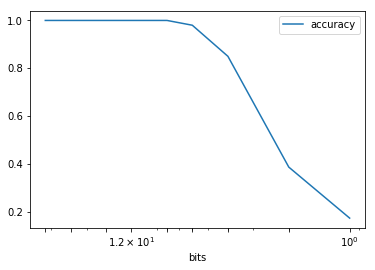

In [42]:
table = pd.DataFrame.from_records(bitResults_acc,columns=["bits","accuracy"])
sortedT = table.sort_values(by=['bits'], ascending=False).reset_index(drop=True)
ax = sortedT.plot(y='accuracy', kind='line', x='bits', logx=True, xticks=sortedT['bits'])
ax.invert_xaxis() 
sortedT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.2,0.2,0.0,0.0,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
2,0.9,0.55,0.7,0.35,0.35,0.4,0.4,0.35,0.3,0.2,0.25,0.3,0.5,0.25,0.0
4,0.9,0.85,0.9,1.0,0.85,0.85,0.85,0.85,0.95,0.95,0.85,1.0,0.95,0.75,0.25
6,1.0,0.95,1.0,1.0,0.95,0.95,1.0,0.95,1.0,1.0,1.0,1.0,1.0,0.95,0.95
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
32,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,0.2,0.20,0.0,0.00,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.2,0.20,0.20,0.20
2,0.9,0.55,0.7,0.35,0.35,0.40,0.40,0.35,0.30,0.20,0.25,0.3,0.50,0.25,0.00
4,0.9,0.85,0.9,1.00,0.85,0.85,0.85,0.85,0.95,0.95,0.85,1.0,0.95,0.75,0.25
6,1.0,0.95,1.0,1.00,0.95,0.95,1.00,0.95,1.00,1.00,1.00,1.0,1.00,0.95,0.95
8,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
12,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
16,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
24,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00
32,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00


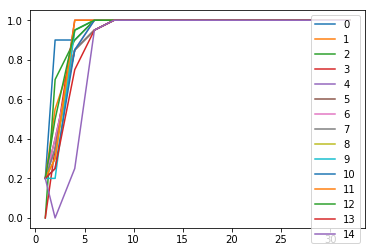

In [89]:
table = pd.DataFrame.from_dict(layer_acc)

ax = table.plot()
import StringIO
s = StringIO.StringIO()


table.to_csv(s)
print s.getvalue()
table

In [96]:
import os;
df = pd.DataFrame(dtype=float, columns=['layer','bit','size','time'])
for frame in os.listdir("/home/philipp/usb/projects/yolo2_light_partitioned/comp/"):
    for layer in os.listdir("/home/philipp/usb/projects/yolo2_light_partitioned/comp/"+frame):
        layername = layer.split("_")[1]
        for f in os.listdir("/home/philipp/usb/projects/yolo2_light_partitioned/comp/"+frame+"/"+layer):
            if not f.endswith("decomp"):
                bits = f.split("_")[0]
                time = f.split("_")[1]
                statinfo = os.stat("/home/philipp/usb/projects/yolo2_light_partitioned/comp/"+frame+"/"+layer+"/"+f)
                size = statinfo.st_size
                df = df.append({'layer': int(layername), 'bit': int(bits), 'time': int(time), 'size':int(size)}, ignore_index=True)



In [116]:
avgTable = df.loc[df['bit'].isin([2,6,12,24])].groupby(['layer','bit']).mean().transpose()
avgTable

layer        0.0                                         1.0              \
bit          2.0         6.0        12.0       24.0      2.0        6.0    
size   1103776.00  2003973.60  3997356.8  8147945.2  277051.2  505975.20   
time        39.45       71.95      123.4      188.1       9.4      17.45   

layer                             2.0                ...          13.0  \
bit         12.0       24.0       2.0         6.0    ...          12.0   
size   1010317.6  2048552.0  534974.40  1102113.60   ...     276515.60   
time        31.2       47.9      19.85       40.75   ...          7.75   

layer               14.0                                15.0           \
bit         24.0    2.0       6.0      12.0     24.0    2.0      6.0    
size   536099.60  7976.0  17514.40  33392.4  65080.4  7697.2  18146.4   
time       11.65     0.0      0.15      0.6      1.0     0.0      0.1   

layer                     
bit        12.0     24.0  
size   33991.20  65680.0  
time       0.15      1.0  

[2 rows x 64 columns]

In [119]:
avgTable = df.groupby(['bit']).mean()
avgTable

,layer,size,time
bit,,,
1.0,7.5,145543.950,4.931250
2.0,7.5,176746.625,6.128125
4.0,7.5,254508.375,9.156250
6.0,7.5,349649.675,12.428125
8.0,7.5,457685.175,15.446875
12.0,7.5,683866.900,20.028125
16.0,7.5,910920.150,23.612500
24.0,7.5,1365002.675,30.878125
32.0,7.5,1819138.625,37.531250


In [120]:
s = StringIO.StringIO()


avgTable.to_csv(s)
print s.getvalue()

bit,layer,size,time
1.0,7.5,145543.95,4.93125
2.0,7.5,176746.625,6.128125
4.0,7.5,254508.375,9.15625
6.0,7.5,349649.675,12.428125
8.0,7.5,457685.175,15.446875
12.0,7.5,683866.9,20.028125
16.0,7.5,910920.15,23.6125
24.0,7.5,1365002.675,30.878125
32.0,7.5,1819138.625,37.53125

